In [3]:
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt
import json
#import requests
#from config import api_key
#from config import email
import pandas as pd
import numpy as np
from citipy import citipy

import gmaps
from config import gkey


In [5]:
# reading database

toluene = pd.read_csv("Database/Toluene/Toluene.csv")
toluene.head()

C:\Users\jjjjj\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (15,24,25,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,STATE_ABBR,AMA_SITE_CODE,AQS_POC,PROGRAM,YEAR,QUARTER,SAMPLE_DATE,SAMPLE_START_TIME,AQS_PARAMETER_CODE,AQS_PARAMETER_NAME,...,AQS_QUALIFIER_10,AQS_METHOD_CODE,SAMPLE_COLLECTION_DESC,SAMPLE_ANALYSIS_DESC,SAMPLE_VALUE_FLAG,BELOW_MDL_FLAG,CENSUS_TRACT_ID,CENSUS_TRACT_POPULATION_2010,MONITOR_LATITUDE,MONITOR_LONGITUDE
0,NJ,340390004,1,SLAMS,2016,3,17-Sep-16,18:00,45202,Toluene,...,NaN,92,Tenax/GR/Trap,Thermal Desorber GC/PID,NaN,NaN,34039030600,3685,40.64144,-74.208365
1,NJ,340390004,1,SLAMS,2016,3,17-Sep-16,05:00,45202,Toluene,...,NaN,92,Tenax/GR/Trap,Thermal Desorber GC/PID,NaN,NaN,34039030600,3685,40.64144,-74.208365
2,NJ,340390004,1,SLAMS,2016,3,18-Sep-16,09:00,45202,Toluene,...,NaN,92,Tenax/GR/Trap,Thermal Desorber GC/PID,NaN,NaN,34039030600,3685,40.64144,-74.208365
3,NJ,340390004,1,SLAMS,2016,3,18-Sep-16,08:00,45202,Toluene,...,NaN,92,Tenax/GR/Trap,Thermal Desorber GC/PID,NaN,NaN,34039030600,3685,40.64144,-74.208365
4,NJ,340390004,1,SLAMS,2016,3,18-Sep-16,07:00,45202,Toluene,...,NaN,92,Tenax/GR/Trap,Thermal Desorber GC/PID,NaN,NaN,34039030600,3685,40.64144,-74.208365


In [6]:
# cleaning up unecesary columns

columns = 'PROGRAM', 'CENSUS_TRACT_POPULATION_2010', 'MONITOR_LATITUDE', 'MONITOR_LONGITUDE', 'YEAR', 'QUARTER','SAMPLE_DATE', 'SAMPLE_START_TIME', 'DATA_SOURCE', 'DURATION_DESC', 'SAMPLE_VALUE_REPORTED', 'UNIT_DESC', 'AQS_UNIT_CODE', 'SAMPLING_FREQUENCY_CODE', 'SAMPLE_VALUE_STD_FINAL_UG_M3','SAMPLE_VALUE_STD_FINAL_TYPE', 'MDL_STD_UG_M3','MDL_TYPE', 'AQS_METHOD_CODE', 'SAMPLE_COLLECTION_DESC', 'SAMPLE_ANALYSIS_DESC'
toluene_clean = toluene.filter(items=columns)
toluene_clean.head()

,PROGRAM,CENSUS_TRACT_POPULATION_2010,MONITOR_LATITUDE,MONITOR_LONGITUDE,YEAR,QUARTER,SAMPLE_DATE,SAMPLE_START_TIME,DATA_SOURCE,DURATION_DESC,...,UNIT_DESC,AQS_UNIT_CODE,SAMPLING_FREQUENCY_CODE,SAMPLE_VALUE_STD_FINAL_UG_M3,SAMPLE_VALUE_STD_FINAL_TYPE,MDL_STD_UG_M3,MDL_TYPE,AQS_METHOD_CODE,SAMPLE_COLLECTION_DESC,SAMPLE_ANALYSIS_DESC
0,SLAMS,3685,40.64144,-74.208365,2016,3,17-Sep-16,18:00,AQS_20171121,1 HOUR,...,PARTS PER BILLION,8,1,0.634496,L,0.376857,FEDERAL_MDL,92,Tenax/GR/Trap,Thermal Desorber GC/PID
1,SLAMS,3685,40.64144,-74.208365,2016,3,17-Sep-16,05:00,AQS_20171121,1 HOUR,...,PARTS PER BILLION,8,1,4.265894,L,0.376857,FEDERAL_MDL,92,Tenax/GR/Trap,Thermal Desorber GC/PID
2,SLAMS,3685,40.64144,-74.208365,2016,3,18-Sep-16,09:00,AQS_20171121,1 HOUR,...,PARTS PER BILLION,8,1,2.103553,L,0.376857,FEDERAL_MDL,92,Tenax/GR/Trap,Thermal Desorber GC/PID
3,SLAMS,3685,40.64144,-74.208365,2016,3,18-Sep-16,08:00,AQS_20171121,1 HOUR,...,PARTS PER BILLION,8,1,2.332506,L,0.376857,FEDERAL_MDL,92,Tenax/GR/Trap,Thermal Desorber GC/PID
4,SLAMS,3685,40.64144,-74.208365,2016,3,18-Sep-16,07:00,AQS_20171121,1 HOUR,...,PARTS PER BILLION,8,1,2.042216,L,0.376857,FEDERAL_MDL,92,Tenax/GR/Trap,Thermal Desorber GC/PID


In [7]:
# getting some basic information about the data

print(toluene_clean.info())
print(toluene_clean.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123860 entries, 0 to 123859
Data columns (total 21 columns):
PROGRAM                         123860 non-null object
CENSUS_TRACT_POPULATION_2010    123860 non-null int64
MONITOR_LATITUDE                123860 non-null float64
MONITOR_LONGITUDE               123860 non-null float64
YEAR                            123860 non-null int64
QUARTER                         123860 non-null int64
SAMPLE_DATE                     123860 non-null object
SAMPLE_START_TIME               123860 non-null object
DATA_SOURCE                     123860 non-null object
DURATION_DESC                   123860 non-null object
SAMPLE_VALUE_REPORTED           123581 non-null float64
UNIT_DESC                       123860 non-null object
AQS_UNIT_CODE                   123860 non-null int64
SAMPLING_FREQUENCY_CODE         123860 non-null object
SAMPLE_VALUE_STD_FINAL_UG_M3    123581 non-null float64
SAMPLE_VALUE_STD_FINAL_TYPE     123860 non-null object
MDL_STD_U

In [8]:
# begining a coding string that results in appending the cities to listed coordinates via jeff and citipy- thanks!

longitude_group = toluene_clean.groupby(by = 'MONITOR_LONGITUDE')
longitude_list = longitude_group['MONITOR_LONGITUDE'].unique()
longitude_list

MONITOR_LONGITUDE
-75.244010     [-75.24401]
-75.125291    [-75.125291]
-75.097617    [-75.097617]
-74.742644    [-74.742644]
-74.676301    [-74.676301]
-74.453808    [-74.453808]
-74.441067    [-74.441067]
-74.429439    [-74.429439]
-74.422403    [-74.422403]
-74.208365    [-74.208365]
-74.199861    [-74.199861]
-74.192892    [-74.192892]
-74.176733    [-74.176733]
-74.168092    [-74.168092]
-74.160611    [-74.160611]
-74.143741    [-74.143741]
-74.126081    [-74.126081]
-73.966212    [-73.966212]
Name: MONITOR_LONGITUDE, dtype: object

In [9]:
# getting coordinate sets

coordinates = []
    
for index, row in toluene_clean.iterrows(): 
    if (row['MONITOR_LATITUDE'], row['MONITOR_LONGITUDE']) not in coordinates:
        coordinates.append((row['MONITOR_LATITUDE'],row['MONITOR_LONGITUDE']))


In [10]:
# getting cities for coordinate pairs

cities = []
for coordinate_pair in coordinates:
    lat, lon = coordinate_pair
    cities.append(citipy.nearest_city(lat, lon))
cities

In [11]:
# setting a list to hold the city names, getting city names

city_names = []
for city in cities:
    city_names.append(city.city_name)
city_names

['elizabeth',
 'north plainfield',
 'elizabeth',
 'north plainfield',
 'new brunswick',
 'ewing',
 'highland park',
 'camden',
 'newark',
 'bayonne',
 'harrison',
 'darby',
 'paterson',
 'paterson',
 'paterson',
 'hopatcong',
 'camden',
 'fort lee']

In [12]:
# display data

city_data = pd.DataFrame({'Coordinates':coordinates,'City Name': city_names})
city_data

,Coordinates,City Name
0,"(40.64144, -74.208365)",elizabeth
1,"(40.601725, -74.441067)",north plainfield
2,"(40.652053, -74.199861)",elizabeth
3,"(40.598028, -74.453808)",north plainfield
4,"(40.462182, -74.429439)",new brunswick
5,"(40.283091999999996, -74.742644)",ewing
6,"(40.472825, -74.422403)",highland park
7,"(39.923041999999995, -75.097617)",camden
8,"(40.720989, -74.192892)",newark
9,"(40.67025, -74.126081)",bayonne


In [13]:
# test

city_data['Coordinates'][0][0]

40.64144

In [15]:
# appending city's to cleaned df

city_index = []
for index, row in toluene_clean.iterrows():
    for cindex, crow in city_data.iterrows():
        if crow['Coordinates'][1] == row['MONITOR_LONGITUDE']:
            city_index.append(crow['City Name'])
            continue
            
toluene_clean['City'] = city_index            
toluene_clean.head()

,PROGRAM,CENSUS_TRACT_POPULATION_2010,MONITOR_LATITUDE,MONITOR_LONGITUDE,YEAR,QUARTER,SAMPLE_DATE,SAMPLE_START_TIME,DATA_SOURCE,DURATION_DESC,...,AQS_UNIT_CODE,SAMPLING_FREQUENCY_CODE,SAMPLE_VALUE_STD_FINAL_UG_M3,SAMPLE_VALUE_STD_FINAL_TYPE,MDL_STD_UG_M3,MDL_TYPE,AQS_METHOD_CODE,SAMPLE_COLLECTION_DESC,SAMPLE_ANALYSIS_DESC,City
0,SLAMS,3685,40.64144,-74.208365,2016,3,17-Sep-16,18:00,AQS_20171121,1 HOUR,...,8,1,0.634496,L,0.376857,FEDERAL_MDL,92,Tenax/GR/Trap,Thermal Desorber GC/PID,elizabeth
1,SLAMS,3685,40.64144,-74.208365,2016,3,17-Sep-16,05:00,AQS_20171121,1 HOUR,...,8,1,4.265894,L,0.376857,FEDERAL_MDL,92,Tenax/GR/Trap,Thermal Desorber GC/PID,elizabeth
2,SLAMS,3685,40.64144,-74.208365,2016,3,18-Sep-16,09:00,AQS_20171121,1 HOUR,...,8,1,2.103553,L,0.376857,FEDERAL_MDL,92,Tenax/GR/Trap,Thermal Desorber GC/PID,elizabeth
3,SLAMS,3685,40.64144,-74.208365,2016,3,18-Sep-16,08:00,AQS_20171121,1 HOUR,...,8,1,2.332506,L,0.376857,FEDERAL_MDL,92,Tenax/GR/Trap,Thermal Desorber GC/PID,elizabeth
4,SLAMS,3685,40.64144,-74.208365,2016,3,18-Sep-16,07:00,AQS_20171121,1 HOUR,...,8,1,2.042216,L,0.376857,FEDERAL_MDL,92,Tenax/GR/Trap,Thermal Desorber GC/PID,elizabeth


In [18]:
#########
## USE ##
#########

toluene_clean.to_csv('toluene_clean_with_cities.csv')

In [19]:
# another look after append.  

# it looks like that there are three testing sites with the nearest city being paterson? 
# all the paterson data has been bundled into one site. this might be an issue...
# let's make a note to look closer here

print(f"program descript: {len(toluene_clean.PROGRAM.value_counts())} programs")
print(toluene_clean.PROGRAM.value_counts())
print()
print(f"duration descript:")
print(toluene_clean.DURATION_DESC.value_counts())
print()
print(f"***total locations: lat-{toluene_clean.MONITOR_LATITUDE.value_counts().count()} / lon-{toluene_clean.MONITOR_LONGITUDE.value_counts().count()}")
print(f"***total cities:  {len(toluene_clean.City.value_counts())}")
print()
print(f"city list: ")
print(toluene_clean.City.value_counts())

program descript: 6 programs
PAMS                            92910
SLAMS                           27433
UATMP                            3116
OTHER                             255
SPECIAL PURPOSE                    95
SCHOOL AIR TOXICS MONITORING       51
Name: PROGRAM, dtype: int64

duration descript:
1 HOUR      119498
24 HOURS      4186
3 HOURS        176
Name: DURATION_DESC, dtype: int64

***total locations: lat-18 / lon-18
***total cities:  13

city list: 
new brunswick       38371
ewing               31304
camden              30234
newark               6313
elizabeth            6249
bayonne              6116
fort lee             2973
hopatcong             962
highland park         911
paterson              187
harrison              125
north plainfield       88
darby                  27
Name: City, dtype: int64


In [20]:
# extracting hourly test data
toluene_hourly = toluene_clean[toluene_clean['DURATION_DESC'] == '1 HOUR']

In [21]:
toluene_hourly.head()

,PROGRAM,CENSUS_TRACT_POPULATION_2010,MONITOR_LATITUDE,MONITOR_LONGITUDE,YEAR,QUARTER,SAMPLE_DATE,SAMPLE_START_TIME,DATA_SOURCE,DURATION_DESC,...,AQS_UNIT_CODE,SAMPLING_FREQUENCY_CODE,SAMPLE_VALUE_STD_FINAL_UG_M3,SAMPLE_VALUE_STD_FINAL_TYPE,MDL_STD_UG_M3,MDL_TYPE,AQS_METHOD_CODE,SAMPLE_COLLECTION_DESC,SAMPLE_ANALYSIS_DESC,City
0,SLAMS,3685,40.64144,-74.208365,2016,3,17-Sep-16,18:00,AQS_20171121,1 HOUR,...,8,1,0.634496,L,0.376857,FEDERAL_MDL,92,Tenax/GR/Trap,Thermal Desorber GC/PID,elizabeth
1,SLAMS,3685,40.64144,-74.208365,2016,3,17-Sep-16,05:00,AQS_20171121,1 HOUR,...,8,1,4.265894,L,0.376857,FEDERAL_MDL,92,Tenax/GR/Trap,Thermal Desorber GC/PID,elizabeth
2,SLAMS,3685,40.64144,-74.208365,2016,3,18-Sep-16,09:00,AQS_20171121,1 HOUR,...,8,1,2.103553,L,0.376857,FEDERAL_MDL,92,Tenax/GR/Trap,Thermal Desorber GC/PID,elizabeth
3,SLAMS,3685,40.64144,-74.208365,2016,3,18-Sep-16,08:00,AQS_20171121,1 HOUR,...,8,1,2.332506,L,0.376857,FEDERAL_MDL,92,Tenax/GR/Trap,Thermal Desorber GC/PID,elizabeth
4,SLAMS,3685,40.64144,-74.208365,2016,3,18-Sep-16,07:00,AQS_20171121,1 HOUR,...,8,1,2.042216,L,0.376857,FEDERAL_MDL,92,Tenax/GR/Trap,Thermal Desorber GC/PID,elizabeth


In [22]:
# extracting daily test data

toluene_daily = toluene_clean[toluene_clean['DURATION_DESC'] == '24 HOURS']
toluene_daily.head()


,PROGRAM,CENSUS_TRACT_POPULATION_2010,MONITOR_LATITUDE,MONITOR_LONGITUDE,YEAR,QUARTER,SAMPLE_DATE,SAMPLE_START_TIME,DATA_SOURCE,DURATION_DESC,...,AQS_UNIT_CODE,SAMPLING_FREQUENCY_CODE,SAMPLE_VALUE_STD_FINAL_UG_M3,SAMPLE_VALUE_STD_FINAL_TYPE,MDL_STD_UG_M3,MDL_TYPE,AQS_METHOD_CODE,SAMPLE_COLLECTION_DESC,SAMPLE_ANALYSIS_DESC,City
1859,UATMP,3685,40.64144,-74.208365,2008,4,09-Oct-08,00:00,AQS_20171121,24 HOURS,...,8,6,3.354024,L,0.086677,ENTITY_ENTERED,101,CANISTER SUBAMBIENT PRESSURE,MULTI DETECTOR GC,elizabeth
1860,UATMP,3685,40.64144,-74.208365,2008,3,20-Jul-08,00:00,AQS_20171121,24 HOURS,...,8,6,1.680781,L,0.086677,ENTITY_ENTERED,101,CANISTER SUBAMBIENT PRESSURE,MULTI DETECTOR GC,elizabeth
1861,UATMP,3685,40.64144,-74.208365,2008,4,26-Dec-08,00:00,AQS_20171121,24 HOURS,...,8,6,NaN,L,0.086677,MIN_OF_ALT_MDL,101,CANISTER SUBAMBIENT PRESSURE,MULTI DETECTOR GC,elizabeth
1862,UATMP,3685,40.64144,-74.208365,2008,4,20-Dec-08,00:00,AQS_20171121,24 HOURS,...,8,6,1.820218,L,0.086677,ENTITY_ENTERED,101,CANISTER SUBAMBIENT PRESSURE,MULTI DETECTOR GC,elizabeth
1863,UATMP,3685,40.64144,-74.208365,2008,4,14-Dec-08,00:00,AQS_20171121,24 HOURS,...,8,6,2.204612,L,0.086677,ENTITY_ENTERED,101,CANISTER SUBAMBIENT PRESSURE,MULTI DETECTOR GC,elizabeth


In [23]:
# extracting three hour duration test data

toluene_three = toluene_clean[toluene_clean['DURATION_DESC'] == '3 HOURS']
toluene_three.head()

,PROGRAM,CENSUS_TRACT_POPULATION_2010,MONITOR_LATITUDE,MONITOR_LONGITUDE,YEAR,QUARTER,SAMPLE_DATE,SAMPLE_START_TIME,DATA_SOURCE,DURATION_DESC,...,AQS_UNIT_CODE,SAMPLING_FREQUENCY_CODE,SAMPLE_VALUE_STD_FINAL_UG_M3,SAMPLE_VALUE_STD_FINAL_TYPE,MDL_STD_UG_M3,MDL_TYPE,AQS_METHOD_CODE,SAMPLE_COLLECTION_DESC,SAMPLE_ANALYSIS_DESC,City
2439,OTHER,6329,40.601725,-74.441067,1993,3,02-Aug-93,05:00,AQS_20171121,3 HOURS,...,78,9,23.241290,L,0.005384,FEDERAL_MDL,123,6L PRESSURIZED CANISTER,DUAL FID - PAMS,north plainfield
2440,OTHER,6329,40.601725,-74.441067,1993,3,23-Jul-93,06:00,AQS_20171121,3 HOURS,...,8,9,1.695855,L,0.376857,FEDERAL_MDL,101,CANISTER SUBAMBIENT PRESSURE,MULTI DETECTOR GC,north plainfield
2441,OTHER,6329,40.601725,-74.441067,1996,3,12-Jul-96,06:00,AQS_20171121,3 HOURS,...,78,9,14.858921,L,0.053837,FEDERAL_MDL,126,SS CANISTER PRESSURIZED,CRYOGENIC PRECONCENTRATION GC/FID,north plainfield
2442,OTHER,6329,40.601725,-74.441067,1996,2,28-Jun-96,06:00,AQS_20171121,3 HOURS,...,78,9,16.619380,L,0.053837,FEDERAL_MDL,126,SS CANISTER PRESSURIZED,CRYOGENIC PRECONCENTRATION GC/FID,north plainfield
2443,OTHER,6329,40.601725,-74.441067,1994,4,13-Oct-94,05:00,AQS_20171121,3 HOURS,...,78,6,59.920213,L,0.005384,FEDERAL_MDL,123,6L PRESSURIZED CANISTER,DUAL FID - PAMS,north plainfield


In [24]:
# grouping overall test result means by year

yearly = toluene_clean.groupby(by='YEAR')
year_group = yearly['SAMPLE_VALUE_STD_FINAL_UG_M3'].mean()
year_group_db = pd.DataFrame(year_group)
year_group_db

,SAMPLE_VALUE_STD_FINAL_UG_M3
YEAR,
1990,10.865009
1991,17.910314
1992,17.469820
1993,12.581520
1994,13.681692
1995,2.379641
1996,4.041037
1997,3.616655
1998,3.285326


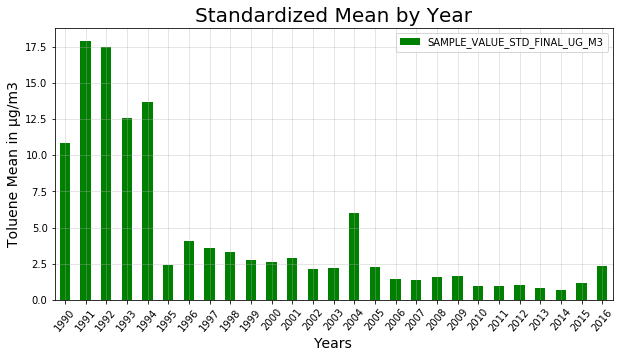

In [75]:
#########
## USE ##
#########


# plotting by year.  
# this might show that there was some change in regulation between 1994 and 1995?

ax = year_group_db.plot.bar(rot=0, figsize=(10,5), color='green')
plt.xlabel('Years', size=14)
plt.ylabel('Toluene Mean in µg/m3', size=14)
plt.title('Standardized Mean by Year', size=20)
plt.grid(alpha=0.4)
plt.xticks(rotation=50)
plt.savefig('toluene_mean_by_year_all_data_sets.png')
plt.show()

In [31]:
# grouping by location

latitude = toluene_clean.groupby(by='MONITOR_LATITUDE')
latitude_group = latitude['SAMPLE_VALUE_STD_FINAL_UG_M3'].mean()
latitude_group_db = pd.DataFrame(latitude_group)
latitude_group_db

,SAMPLE_VALUE_STD_FINAL_UG_M3
MONITOR_LATITUDE,
39.837090,2.372627
39.923042,2.753091
39.934446,2.810341
40.283092,1.406715
40.462182,3.098485
40.472825,2.979197
40.598028,18.624098
40.601725,18.772494
40.641440,2.973165


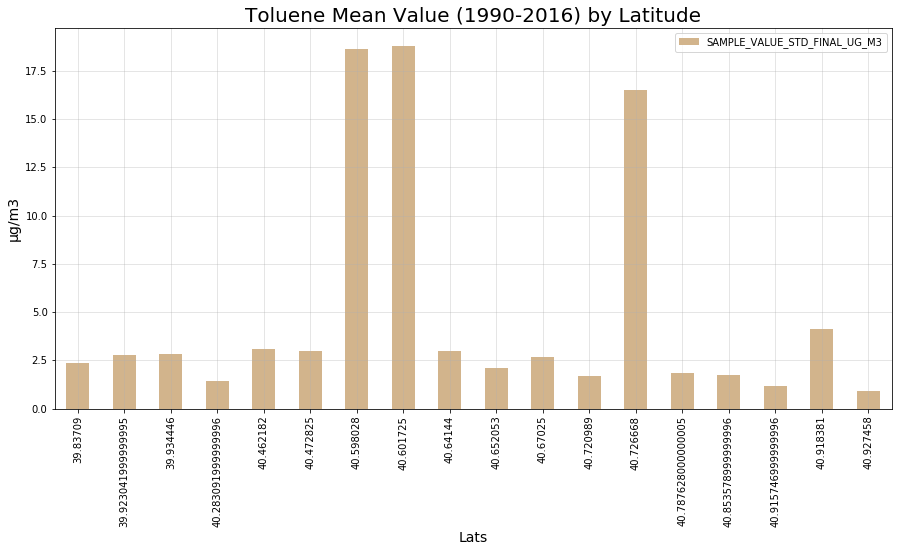

In [76]:
#########
## USE ##???
#########

# getting result means by location

ax = latitude_group_db.plot.bar(rot=0, figsize=(15,7), color='tan')
plt.xlabel('Lats', size=14)
plt.ylabel('µg/m3', size=14)
plt.title('Toluene Mean Value (1990-2016) by Latitude', size=20)
plt.grid(alpha=0.4)
plt.xticks(rotation=90)
plt.savefig('toluene_mean_by_lat_bar.png')

# plt.show()

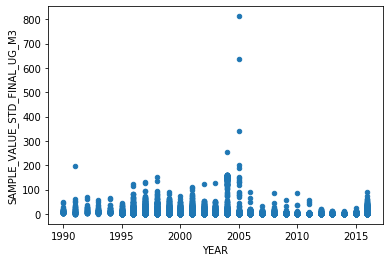

In [37]:
# next scatter plots look at the sample values across all testing durations
# below is overall

toluene_clean.plot.scatter(x='YEAR', y='SAMPLE_VALUE_STD_FINAL_UG_M3')

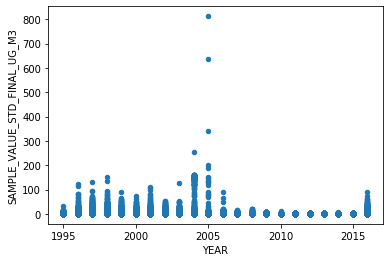

In [38]:
# sample values for hourly tests

toluene_hourly.plot.scatter(x='YEAR', y='SAMPLE_VALUE_STD_FINAL_UG_M3')

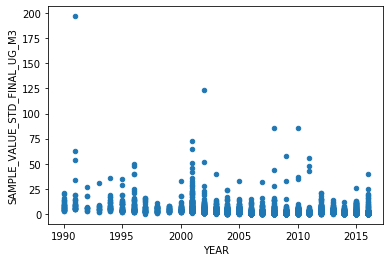

In [39]:
# sample values for daily tests

toluene_daily.plot.scatter(x='YEAR', y='SAMPLE_VALUE_STD_FINAL_UG_M3')

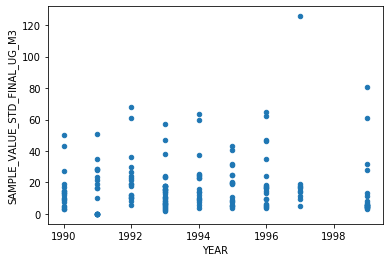

In [40]:
# sample values for three our duration tests

toluene_three.plot.scatter(x='YEAR', y='SAMPLE_VALUE_STD_FINAL_UG_M3')

In [41]:
# breaking out the following 6 programs into their own df's for future analysis

print(toluene_clean.PROGRAM.value_counts())

PAMS                            92910
SLAMS                           27433
UATMP                            3116
OTHER                             255
SPECIAL PURPOSE                    95
SCHOOL AIR TOXICS MONITORING       51
Name: PROGRAM, dtype: int64


In [42]:
# 1
pams_toluene_df = toluene_clean.loc[toluene_clean["PROGRAM"] =="PAMS"]
pams_toluene_df.head()

,PROGRAM,CENSUS_TRACT_POPULATION_2010,MONITOR_LATITUDE,MONITOR_LONGITUDE,YEAR,QUARTER,SAMPLE_DATE,SAMPLE_START_TIME,DATA_SOURCE,DURATION_DESC,...,AQS_UNIT_CODE,SAMPLING_FREQUENCY_CODE,SAMPLE_VALUE_STD_FINAL_UG_M3,SAMPLE_VALUE_STD_FINAL_TYPE,MDL_STD_UG_M3,MDL_TYPE,AQS_METHOD_CODE,SAMPLE_COLLECTION_DESC,SAMPLE_ANALYSIS_DESC,City
3718,PAMS,5231,40.462182,-74.429439,1997,2,13-Jun-97,22:00,AQS_20171121,1 HOUR,...,78,1,3.014853,L,0.005384,FEDERAL_MDL,128,PRECONCENTRATION TRAP,PE 8700;AUTO GC;SUBAMBIENT-DUAL FID,new brunswick
3719,PAMS,5231,40.462182,-74.429439,1997,2,15-Jun-97,06:00,AQS_20171121,1 HOUR,...,78,1,1.453590,L,0.005384,FEDERAL_MDL,128,PRECONCENTRATION TRAP,PE 8700;AUTO GC;SUBAMBIENT-DUAL FID,new brunswick
3720,PAMS,5231,40.462182,-74.429439,1997,2,14-Jun-97,07:00,AQS_20171121,1 HOUR,...,78,1,1.022897,L,0.005384,FEDERAL_MDL,128,PRECONCENTRATION TRAP,PE 8700;AUTO GC;SUBAMBIENT-DUAL FID,new brunswick
3721,PAMS,5231,40.462182,-74.429439,1997,2,14-Jun-97,06:00,AQS_20171121,1 HOUR,...,78,1,2.368813,L,0.005384,FEDERAL_MDL,128,PRECONCENTRATION TRAP,PE 8700;AUTO GC;SUBAMBIENT-DUAL FID,new brunswick
3722,PAMS,5231,40.462182,-74.429439,1997,2,14-Jun-97,05:00,AQS_20171121,1 HOUR,...,78,1,36.285915,L,0.005384,FEDERAL_MDL,128,PRECONCENTRATION TRAP,PE 8700;AUTO GC;SUBAMBIENT-DUAL FID,new brunswick


In [43]:
# beginning testing for geo-mapping overlay

pams = pams_toluene_df.groupby(['YEAR'])
pams_maxes = pd.DataFrame(pams['SAMPLE_VALUE_STD_FINAL_UG_M3'].max())
pams_maxes.head()

,SAMPLE_VALUE_STD_FINAL_UG_M3
YEAR,
1990,20.387947
1991,196.945304
1992,27.171367
1993,30.676134
1994,35.876756


In [44]:
pams_lat_array = pams_toluene_df['MONITOR_LATITUDE'].unique()
pams_lat_array

array([40.462182, 40.283092, 39.923042])

In [45]:
pams_lng_array = pams_toluene_df['MONITOR_LONGITUDE'].unique()
pams_lng_array

array([-74.429439, -74.742644, -75.097617])

In [46]:
pams_coords = [
    (40.462182, -74.429439),
    (40.283092, -74.742644),
    (39.923042, -75.097617)
]

In [47]:
figure_layout = {
    'width': '800px',
    'height': '300px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)


In [48]:
markers = gmaps.marker_layer(pams_coords)
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(border='1px solid black', height='300px', margin='0 auto 0 auto', padding='1px', wi…

In [49]:
locations = pams_toluene_df[['MONITOR_LATITUDE', 'MONITOR_LONGITUDE']]
weights = pams_toluene_df['SAMPLE_VALUE_STD_FINAL_UG_M3']
fig = gmaps.figure()
fig.add_layer(gmaps.heatmap_layer(locations, weights=weights))
fig

Figure(layout=FigureLayout(height='420px'))

In [50]:
# 2 

slams_toluene_df = toluene_clean.loc[toluene_clean["PROGRAM"] =="SLAMS"]
slams_toluene_df.head()

,PROGRAM,CENSUS_TRACT_POPULATION_2010,MONITOR_LATITUDE,MONITOR_LONGITUDE,YEAR,QUARTER,SAMPLE_DATE,SAMPLE_START_TIME,DATA_SOURCE,DURATION_DESC,...,AQS_UNIT_CODE,SAMPLING_FREQUENCY_CODE,SAMPLE_VALUE_STD_FINAL_UG_M3,SAMPLE_VALUE_STD_FINAL_TYPE,MDL_STD_UG_M3,MDL_TYPE,AQS_METHOD_CODE,SAMPLE_COLLECTION_DESC,SAMPLE_ANALYSIS_DESC,City
0,SLAMS,3685,40.64144,-74.208365,2016,3,17-Sep-16,18:00,AQS_20171121,1 HOUR,...,8,1,0.634496,L,0.376857,FEDERAL_MDL,92,Tenax/GR/Trap,Thermal Desorber GC/PID,elizabeth
1,SLAMS,3685,40.64144,-74.208365,2016,3,17-Sep-16,05:00,AQS_20171121,1 HOUR,...,8,1,4.265894,L,0.376857,FEDERAL_MDL,92,Tenax/GR/Trap,Thermal Desorber GC/PID,elizabeth
2,SLAMS,3685,40.64144,-74.208365,2016,3,18-Sep-16,09:00,AQS_20171121,1 HOUR,...,8,1,2.103553,L,0.376857,FEDERAL_MDL,92,Tenax/GR/Trap,Thermal Desorber GC/PID,elizabeth
3,SLAMS,3685,40.64144,-74.208365,2016,3,18-Sep-16,08:00,AQS_20171121,1 HOUR,...,8,1,2.332506,L,0.376857,FEDERAL_MDL,92,Tenax/GR/Trap,Thermal Desorber GC/PID,elizabeth
4,SLAMS,3685,40.64144,-74.208365,2016,3,18-Sep-16,07:00,AQS_20171121,1 HOUR,...,8,1,2.042216,L,0.376857,FEDERAL_MDL,92,Tenax/GR/Trap,Thermal Desorber GC/PID,elizabeth


In [51]:
slams = slams_toluene_df.groupby(['YEAR'])
slams_maxes = pd.DataFrame(slams['SAMPLE_VALUE_STD_FINAL_UG_M3'].max())
slams_maxes.head()

,SAMPLE_VALUE_STD_FINAL_UG_M3
YEAR,
2002,123.797421
2003,11.946357
2004,23.741971
2005,32.447361
2006,4.624032


In [52]:
slams_lat_array = slams_toluene_df['MONITOR_LATITUDE'].unique()
slams_lat_array

array([40.64144 , 40.472825, 40.720989, 40.67025 , 40.918381, 40.462182,
       39.934446, 40.853579])

In [53]:
slams_lng_array = slams_toluene_df['MONITOR_LONGITUDE'].unique()
slams_lng_array

array([-74.208365, -74.422403, -74.192892, -74.126081, -74.168092,
       -74.429439, -75.125291, -73.966212])

In [54]:
slams_coords =[
    (40.64144,-74.208365),
    (40.472825,-74.422403),
    (40.720989,-74.192892),
    (40.67025,-74.126081),
]

In [55]:
# 3 

uatmp_toluene_df = toluene_clean.loc[toluene_clean["PROGRAM"] =="UATMP"]
uatmp_toluene_df.head()

,PROGRAM,CENSUS_TRACT_POPULATION_2010,MONITOR_LATITUDE,MONITOR_LONGITUDE,YEAR,QUARTER,SAMPLE_DATE,SAMPLE_START_TIME,DATA_SOURCE,DURATION_DESC,...,AQS_UNIT_CODE,SAMPLING_FREQUENCY_CODE,SAMPLE_VALUE_STD_FINAL_UG_M3,SAMPLE_VALUE_STD_FINAL_TYPE,MDL_STD_UG_M3,MDL_TYPE,AQS_METHOD_CODE,SAMPLE_COLLECTION_DESC,SAMPLE_ANALYSIS_DESC,City
1859,UATMP,3685,40.64144,-74.208365,2008,4,09-Oct-08,00:00,AQS_20171121,24 HOURS,...,8,6,3.354024,L,0.086677,ENTITY_ENTERED,101,CANISTER SUBAMBIENT PRESSURE,MULTI DETECTOR GC,elizabeth
1860,UATMP,3685,40.64144,-74.208365,2008,3,20-Jul-08,00:00,AQS_20171121,24 HOURS,...,8,6,1.680781,L,0.086677,ENTITY_ENTERED,101,CANISTER SUBAMBIENT PRESSURE,MULTI DETECTOR GC,elizabeth
1861,UATMP,3685,40.64144,-74.208365,2008,4,26-Dec-08,00:00,AQS_20171121,24 HOURS,...,8,6,NaN,L,0.086677,MIN_OF_ALT_MDL,101,CANISTER SUBAMBIENT PRESSURE,MULTI DETECTOR GC,elizabeth
1862,UATMP,3685,40.64144,-74.208365,2008,4,20-Dec-08,00:00,AQS_20171121,24 HOURS,...,8,6,1.820218,L,0.086677,ENTITY_ENTERED,101,CANISTER SUBAMBIENT PRESSURE,MULTI DETECTOR GC,elizabeth
1863,UATMP,3685,40.64144,-74.208365,2008,4,14-Dec-08,00:00,AQS_20171121,24 HOURS,...,8,6,2.204612,L,0.086677,ENTITY_ENTERED,101,CANISTER SUBAMBIENT PRESSURE,MULTI DETECTOR GC,elizabeth


In [56]:
# 4

other_toluene_df = toluene_clean.loc[toluene_clean["PROGRAM"] =="OTHER"]
other_toluene_df.head()

,PROGRAM,CENSUS_TRACT_POPULATION_2010,MONITOR_LATITUDE,MONITOR_LONGITUDE,YEAR,QUARTER,SAMPLE_DATE,SAMPLE_START_TIME,DATA_SOURCE,DURATION_DESC,...,AQS_UNIT_CODE,SAMPLING_FREQUENCY_CODE,SAMPLE_VALUE_STD_FINAL_UG_M3,SAMPLE_VALUE_STD_FINAL_TYPE,MDL_STD_UG_M3,MDL_TYPE,AQS_METHOD_CODE,SAMPLE_COLLECTION_DESC,SAMPLE_ANALYSIS_DESC,City
2439,OTHER,6329,40.601725,-74.441067,1993,3,02-Aug-93,05:00,AQS_20171121,3 HOURS,...,78,9,23.241290,L,0.005384,FEDERAL_MDL,123,6L PRESSURIZED CANISTER,DUAL FID - PAMS,north plainfield
2440,OTHER,6329,40.601725,-74.441067,1993,3,23-Jul-93,06:00,AQS_20171121,3 HOURS,...,8,9,1.695855,L,0.376857,FEDERAL_MDL,101,CANISTER SUBAMBIENT PRESSURE,MULTI DETECTOR GC,north plainfield
2441,OTHER,6329,40.601725,-74.441067,1996,3,12-Jul-96,06:00,AQS_20171121,3 HOURS,...,78,9,14.858921,L,0.053837,FEDERAL_MDL,126,SS CANISTER PRESSURIZED,CRYOGENIC PRECONCENTRATION GC/FID,north plainfield
2442,OTHER,6329,40.601725,-74.441067,1996,2,28-Jun-96,06:00,AQS_20171121,3 HOURS,...,78,9,16.619380,L,0.053837,FEDERAL_MDL,126,SS CANISTER PRESSURIZED,CRYOGENIC PRECONCENTRATION GC/FID,north plainfield
2443,OTHER,6329,40.601725,-74.441067,1994,4,13-Oct-94,05:00,AQS_20171121,3 HOURS,...,78,6,59.920213,L,0.005384,FEDERAL_MDL,123,6L PRESSURIZED CANISTER,DUAL FID - PAMS,north plainfield


In [57]:
# 5

special_purpose_toluene_df = toluene_clean.loc[toluene_clean["PROGRAM"] =="SPECIAL PURPOSE"]
special_purpose_toluene_df.head()

,PROGRAM,CENSUS_TRACT_POPULATION_2010,MONITOR_LATITUDE,MONITOR_LONGITUDE,YEAR,QUARTER,SAMPLE_DATE,SAMPLE_START_TIME,DATA_SOURCE,DURATION_DESC,...,AQS_UNIT_CODE,SAMPLING_FREQUENCY_CODE,SAMPLE_VALUE_STD_FINAL_UG_M3,SAMPLE_VALUE_STD_FINAL_TYPE,MDL_STD_UG_M3,MDL_TYPE,AQS_METHOD_CODE,SAMPLE_COLLECTION_DESC,SAMPLE_ANALYSIS_DESC,City
75563,SPECIAL PURPOSE,3850,40.915747,-74.176733,2006,4,14-Oct-06,00:00,AQS_20171121,24 HOURS,...,78,6,0.592203,L,0.053837,FEDERAL_MDL,101,CANISTER SUBAMBIENT PRESSURE,MULTI DETECTOR GC,paterson
75565,SPECIAL PURPOSE,3850,40.915747,-74.176733,2006,4,07-Dec-06,00:00,AQS_20171121,24 HOURS,...,78,6,0.301485,L,0.053837,FEDERAL_MDL,101,CANISTER SUBAMBIENT PRESSURE,MULTI DETECTOR GC,paterson
75566,SPECIAL PURPOSE,3850,40.915747,-74.176733,2006,4,01-Dec-06,00:00,AQS_20171121,24 HOURS,...,78,6,0.641195,L,0.053837,FEDERAL_MDL,101,CANISTER SUBAMBIENT PRESSURE,MULTI DETECTOR GC,paterson
75567,SPECIAL PURPOSE,3850,40.915747,-74.176733,2006,4,19-Nov-06,00:00,AQS_20171121,24 HOURS,...,78,6,0.279951,L,0.053837,FEDERAL_MDL,101,CANISTER SUBAMBIENT PRESSURE,MULTI DETECTOR GC,paterson
75568,SPECIAL PURPOSE,3850,40.915747,-74.176733,2006,4,13-Nov-06,00:00,AQS_20171121,24 HOURS,...,78,6,0.829623,L,0.053837,FEDERAL_MDL,101,CANISTER SUBAMBIENT PRESSURE,MULTI DETECTOR GC,paterson


In [58]:
# 6

school_toluene_df = toluene_clean.loc[toluene_clean["PROGRAM"] =="SCHOOL AIR TOXICS MONITORING"]
school_toluene_df.head()

,PROGRAM,CENSUS_TRACT_POPULATION_2010,MONITOR_LATITUDE,MONITOR_LONGITUDE,YEAR,QUARTER,SAMPLE_DATE,SAMPLE_START_TIME,DATA_SOURCE,DURATION_DESC,...,AQS_UNIT_CODE,SAMPLING_FREQUENCY_CODE,SAMPLE_VALUE_STD_FINAL_UG_M3,SAMPLE_VALUE_STD_FINAL_TYPE,MDL_STD_UG_M3,MDL_TYPE,AQS_METHOD_CODE,SAMPLE_COLLECTION_DESC,SAMPLE_ANALYSIS_DESC,City
2468,SCHOOL AIR TOXICS MONITORING,6072,40.652053,-74.199861,2009,4,10-Oct-09,00:00,AQS_20171121,24 HOURS,...,8,6,NaN,L,0.030149,MIN_OF_ALT_MDL,101,CANISTER SUBAMBIENT PRESSURE,MULTI DETECTOR GC,elizabeth
2469,SCHOOL AIR TOXICS MONITORING,6072,40.652053,-74.199861,2010,1,19-Jan-10,09:19,AQS_20171121,24 HOURS,...,8,9,3.919310,L,0.030149,ENTITY_ENTERED,101,CANISTER SUBAMBIENT PRESSURE,MULTI DETECTOR GC,elizabeth
2470,SCHOOL AIR TOXICS MONITORING,6072,40.652053,-74.199861,2010,1,13-Jan-10,10:11,AQS_20171121,24 HOURS,...,8,9,2.148083,L,0.030149,ENTITY_ENTERED,101,CANISTER SUBAMBIENT PRESSURE,MULTI DETECTOR GC,elizabeth
2471,SCHOOL AIR TOXICS MONITORING,6072,40.652053,-74.199861,2009,4,22-Dec-09,10:22,AQS_20171121,24 HOURS,...,8,6,0.535136,L,0.030149,ENTITY_ENTERED,101,CANISTER SUBAMBIENT PRESSURE,MULTI DETECTOR GC,elizabeth
2472,SCHOOL AIR TOXICS MONITORING,6072,40.652053,-74.199861,2009,4,15-Dec-09,12:00,AQS_20171121,24 HOURS,...,8,6,0.414542,L,0.030149,ENTITY_ENTERED,101,CANISTER SUBAMBIENT PRESSURE,MULTI DETECTOR GC,elizabeth


In [59]:
school_lat_array = school_toluene_df['MONITOR_LATITUDE'].unique()
school_lat_array

array([40.652053, 39.83709 ])

In [60]:
school_lng_array = school_toluene_df['MONITOR_LONGITUDE'].unique()
school_lng_array

array([-74.199861, -75.24401 ])

In [61]:
school_coords = [
    (40.652053, -74.199861),
    (39.83709, -75.24401)
]

In [62]:
figure_layout = {
    'width': '800px',
    'height': '300px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)

In [63]:
markers = gmaps.marker_layer(school_coords)
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(border='1px solid black', height='300px', margin='0 auto 0 auto', padding='1px', wi…

In [64]:
locations = school_toluene_df[['MONITOR_LATITUDE', 'MONITOR_LONGITUDE']]
weights = school_toluene_df['SAMPLE_VALUE_STD_FINAL_UG_M3']
fig = gmaps.figure()
fig.add_layer(gmaps.heatmap_layer(locations, weights=weights))
fig

Figure(layout=FigureLayout(height='420px'))

In [65]:
# looking at how much data per city

print(toluene_clean.City.value_counts())

new brunswick       38371
ewing               31304
camden              30234
newark               6313
elizabeth            6249
bayonne              6116
fort lee             2973
hopatcong             962
highland park         911
paterson              187
harrison              125
north plainfield       88
darby                  27
Name: City, dtype: int64


In [66]:
#########
## USE ##
#########


# getting the overall means per city for entire data set

city_groupby = toluene_clean.groupby(by='City')
city_groupby = city_groupby['SAMPLE_VALUE_STD_FINAL_UG_M3'].mean()
city_groupby_db = pd.DataFrame(city_groupby)
city_groupby_db

,SAMPLE_VALUE_STD_FINAL_UG_M3
City,
bayonne,2.686103
camden,2.765113
darby,2.372627
elizabeth,2.971632
ewing,1.406715
fort lee,1.720701
harrison,16.516229
highland park,2.979197
hopatcong,1.824185


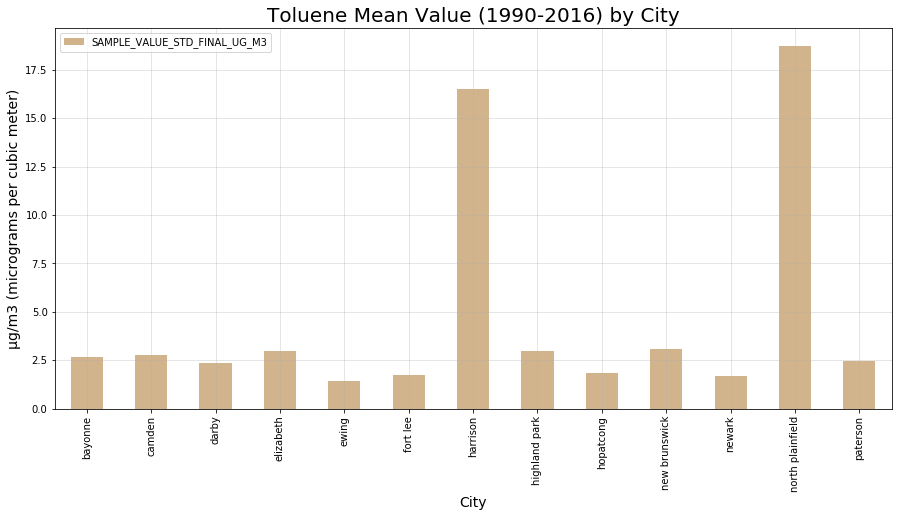

In [77]:
#########
## USE ##
#########
#??????#


# a look at the lat graph approach but organized by city. 
# pretty different. see paterson.

ax = city_groupby_db.plot.bar(rot=0, figsize=(15,7), color='tan')
plt.xlabel('City', size=14)
plt.ylabel('µg/m3 (micrograms per cubic meter)', size=14)
plt.title('Toluene Mean Value (1990-2016) by City', size=20)
plt.grid(alpha=0.4)
plt.xticks(rotation=90)
plt.savefig('toluene_mean_by_city_bar.png')
plt.show()

In [78]:
#########
## USE ##
#########


# multi level index df (groupby) to get yearly means by city. 

yearcity_groupby = toluene_clean.groupby(['City', 'YEAR'])['SAMPLE_VALUE_STD_FINAL_UG_M3']
mean_by_year = yearcity_groupby.mean()
mean_by_year_df = pd.DataFrame(mean_by_year)
mean_by_year_df.head()

SAMPLE_VALUE_STD_FINAL_UG_M3
City    YEAR                              
bayonne 2016                      2.686103
camden  1990                      8.306651
        1991                     20.145682
        1992                      9.176460
        1993                      7.367548

In [79]:
#########
## USE ##
#########

# multi level index df (groupby) to get yearly means by city. 
yearcity_groupby = toluene_clean.groupby(['City', 'YEAR'])['SAMPLE_VALUE_STD_FINAL_UG_M3']
max_by_year = yearcity_groupby.max()
max_by_year_df = pd.DataFrame(max_by_year)
max_by_year_df.head()

SAMPLE_VALUE_STD_FINAL_UG_M3
City    YEAR                              
bayonne 2016                     38.578051
camden  1990                     20.387947
        1991                    196.945304
        1992                     27.171367
        1993                     30.676134

In [80]:
#########
## USE ##
#########

clean_max = max_by_year_df.reset_index().pivot('YEAR','City','SAMPLE_VALUE_STD_FINAL_UG_M3')
clean_max

City,bayonne,camden,darby,elizabeth,ewing,fort lee,harrison,highland park,hopatcong,new brunswick,newark,north plainfield,paterson
YEAR,,,,,,,,,,,,,
1990,NaN,20.387947,NaN,NaN,NaN,NaN,43.300833,NaN,NaN,NaN,NaN,50.272682,NaN
1991,NaN,196.945304,NaN,NaN,NaN,NaN,50.837967,NaN,NaN,NaN,NaN,19.144320,NaN
1992,NaN,27.171367,NaN,NaN,NaN,NaN,22.649087,NaN,NaN,NaN,NaN,67.758832,NaN
1993,NaN,30.676134,NaN,NaN,NaN,NaN,47.096318,NaN,NaN,NaN,NaN,57.206845,NaN
1994,NaN,35.876756,NaN,NaN,NaN,NaN,25.249398,NaN,NaN,NaN,NaN,63.581106,NaN
1995,NaN,35.198414,NaN,NaN,34.401632,NaN,43.150090,NaN,NaN,NaN,NaN,40.635918,NaN
1996,NaN,20.425632,NaN,NaN,37.685669,NaN,46.994029,NaN,NaN,121.563199,NaN,65.034697,NaN
1997,NaN,37.793342,NaN,NaN,21.157811,NaN,125.681704,NaN,NaN,130.930780,NaN,NaN,NaN
1998,NaN,24.226501,NaN,NaN,21.265484,NaN,NaN,NaN,NaN,149.719777,NaN,NaN,NaN


In [81]:
#########
## USE ##
#########

# flattening groupby into a level df

clean_means = mean_by_year_df.reset_index().pivot('YEAR','City','SAMPLE_VALUE_STD_FINAL_UG_M3')
clean_means

City,bayonne,camden,darby,elizabeth,ewing,fort lee,harrison,highland park,hopatcong,new brunswick,newark,north plainfield,paterson
YEAR,,,,,,,,,,,,,
1990,NaN,8.306651,NaN,NaN,NaN,NaN,17.255849,NaN,NaN,NaN,NaN,13.286292,NaN
1991,NaN,20.145682,NaN,NaN,NaN,NaN,25.856137,NaN,NaN,NaN,NaN,2.127147,NaN
1992,NaN,9.176460,NaN,NaN,NaN,NaN,13.968821,NaN,NaN,NaN,NaN,32.028631,NaN
1993,NaN,7.367548,NaN,NaN,NaN,NaN,14.758426,NaN,NaN,NaN,NaN,14.570420,NaN
1994,NaN,9.172692,NaN,NaN,NaN,NaN,16.714132,NaN,NaN,NaN,NaN,26.799894,NaN
1995,NaN,5.763008,NaN,NaN,2.132794,NaN,11.819542,NaN,NaN,NaN,NaN,16.837717,NaN
1996,NaN,5.394848,NaN,NaN,2.633098,NaN,15.772350,NaN,NaN,5.207059,NaN,25.323274,NaN
1997,NaN,3.793817,NaN,NaN,1.980542,NaN,25.030821,NaN,NaN,5.032487,NaN,NaN,NaN
1998,NaN,3.359554,NaN,NaN,1.678832,NaN,NaN,NaN,NaN,4.810409,NaN,NaN,NaN


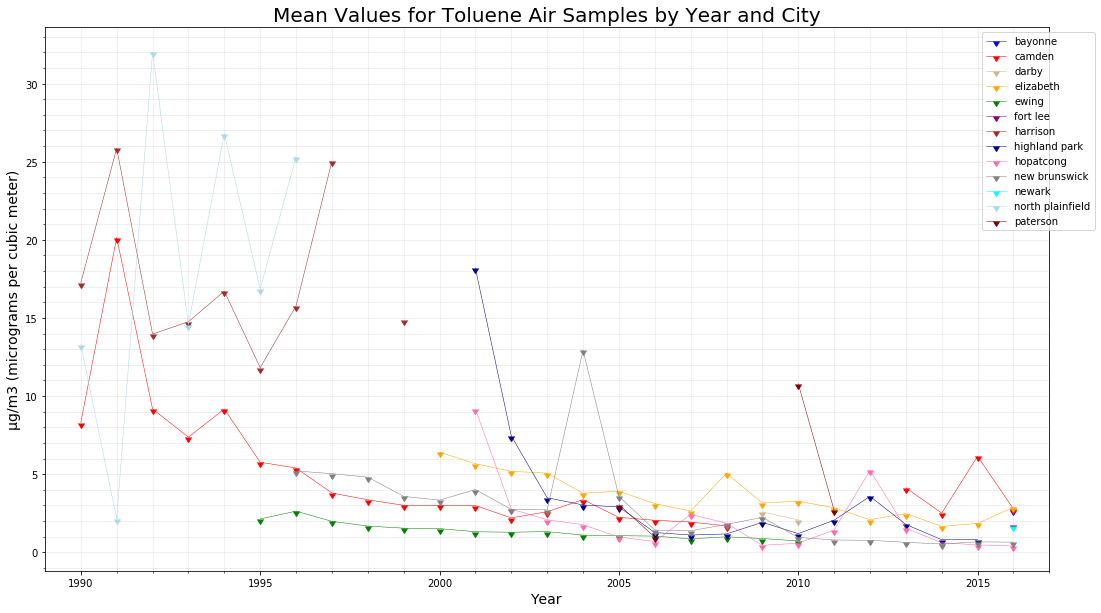

In [82]:
#########
## USE ##
#########


# a graphic look into city mean by year
# the drop off in the original data looks like it is due to the end of...
# ...data sampling sites for north plainfeild and harrison which recorded incredibly high levels!!
colors = ['blue', 'red', 'tan', 'orange', 'green', 'purple', 'brown', 'darkblue', 'hotpink', 'grey', 'aqua', 'lightblue', 'maroon']
clean_means.plot(sharex='all', figsize=(18,10), color=colors, marker=11, linewidth=0.5)
plt.grid(b=None, which='both', axis='both', alpha=0.25)
plt.legend(bbox_to_anchor=(1.05,1))
plt.ylabel('µg/m3 (micrograms per cubic meter)', size=14)
plt.xlabel('Year', size=14)
plt.xlim(1989,2017)
plt.minorticks_on()
plt.title('Mean Values for Toluene Air Samples by Year and City', size=20)
plt.savefig('toluene_mean_values_per_city.png')


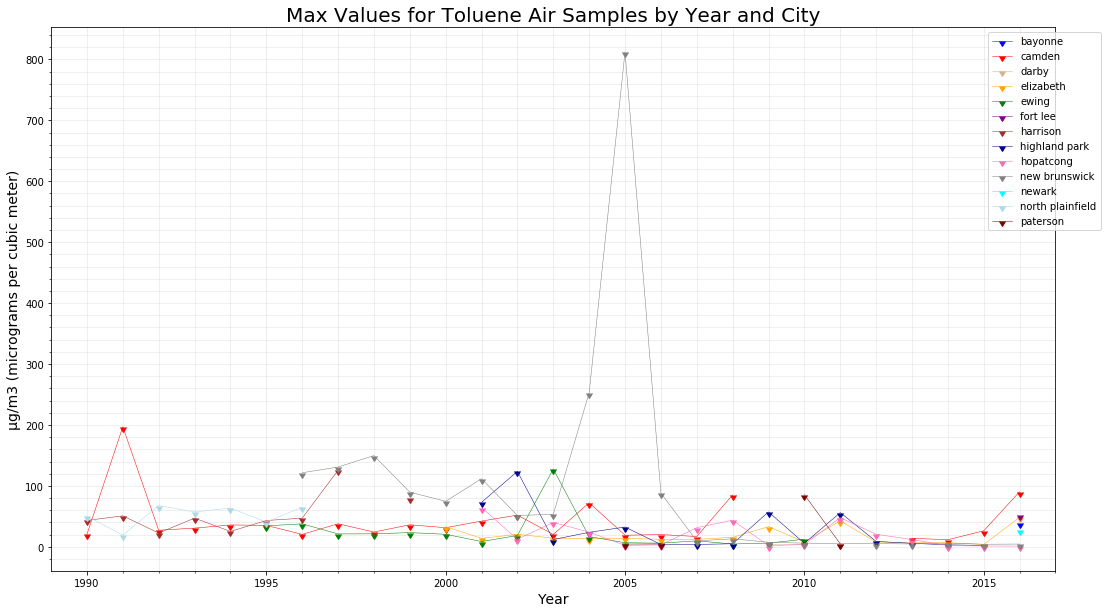

In [83]:
#########
## USE ##
#########

colors = ['blue', 'red', 'tan', 'orange', 'green', 'purple', 'brown', 'darkblue', 'hotpink', 'grey', 'aqua', 'lightblue', 'maroon']

clean_max.plot(sharex='all', figsize=(18,10), color=colors, marker=11, linewidth=0.5)
plt.grid(b=None, which='both', axis='both', alpha=0.25)
plt.legend(bbox_to_anchor=(1.05,1))
plt.ylabel('µg/m3 (micrograms per cubic meter)', size=14)
plt.xlabel('Year', size=14)
plt.xlim(1989,2017)
plt.minorticks_on()
plt.title('Max Values for Toluene Air Samples by Year and City', size=20)
plt.savefig('toluene_max_values_per_city.png')


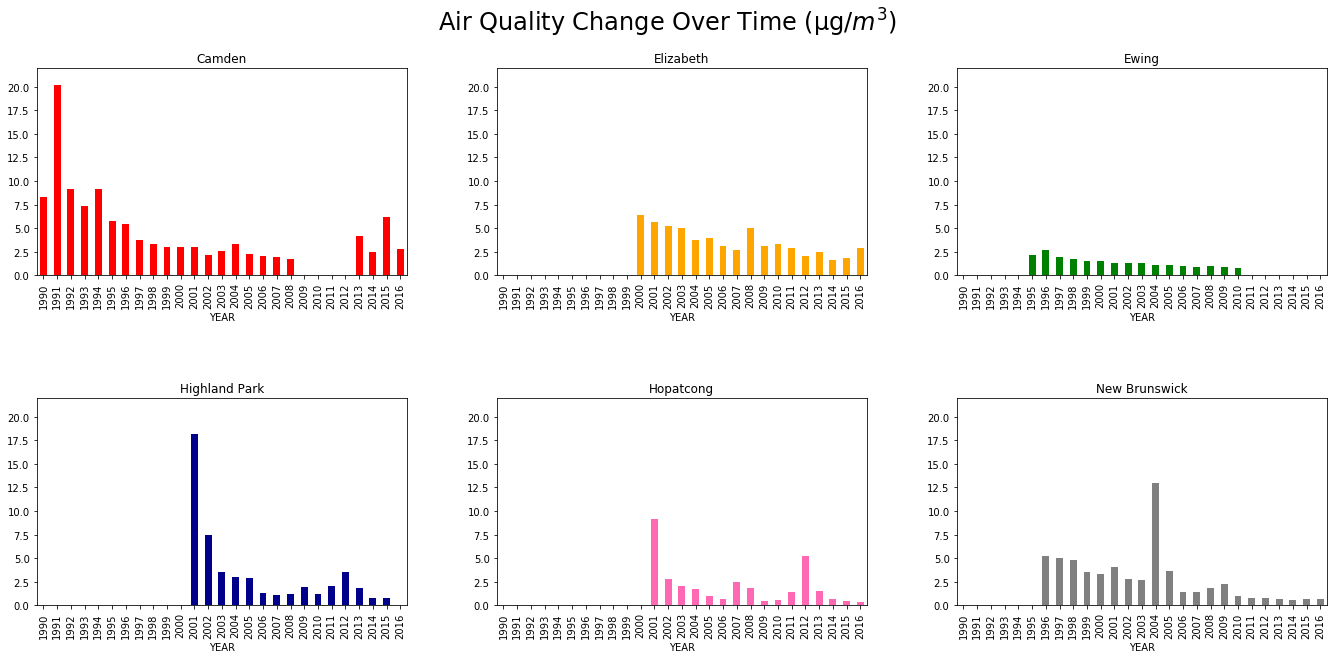

In [90]:
#########
## USE ##
#########

# highlights of specific city's. city's must have recorded at least 10 years of data.

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,10))
fig.suptitle("Air Quality Change Over Time (μg/$m^3$)", size = 24, va= 'top')

clean_means['camden'].plot(kind='bar', color='red', ax=axes[0,0], ylim=(0,22), legend=False)
axes[0,0].set_title("Camden")

clean_means['elizabeth'].plot(kind='bar', color='orange', ax=axes[0,1], ylim=(0,22), legend=False)
axes[0,1].set_title("Elizabeth")

clean_means['ewing'].plot(kind='bar', color='green', ax=axes[0,2], ylim=(0,22), legend=False)
axes[0,2].set_title("Ewing")

clean_means['highland park'].plot(kind='bar', color = 'darkblue', ax=axes[1,0], ylim=(0,22), legend=False)
axes[1,0].set_title("Highland Park")

clean_means['hopatcong'].plot(kind='bar', color='hotpink', ax=axes[1,1], ylim=(0,22), legend=False)
axes[1,1].set_title("Hopatcong")

clean_means['new brunswick'].plot(kind='bar', color='grey', ax=axes[1,2], ylim=(0,22), legend=False)
axes[1,2].set_title("New Brunswick")

# fig.subplots_adjust(hspace=0.45,wspace=0.1)
plt.tight_layout(pad=6)
plt.savefig('toluene_mean_values_city_highlights.png')


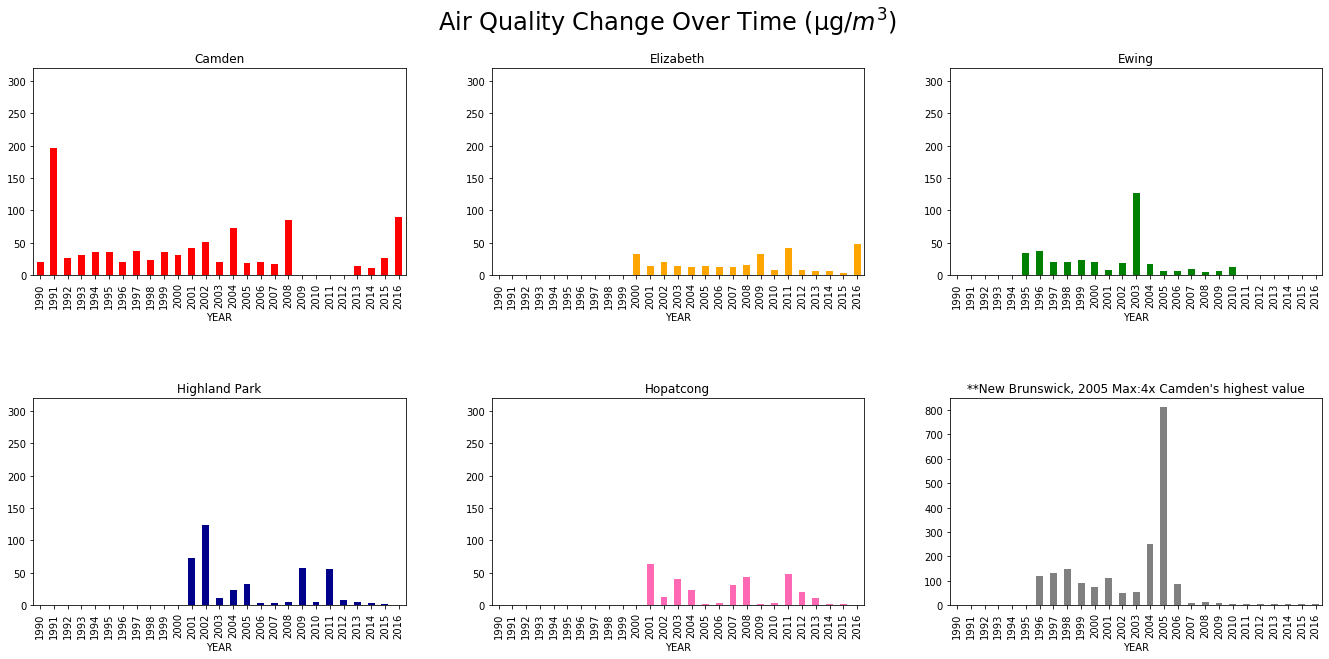

In [96]:
#########
## USE ##
#########

# highlights of specific city's. city's must have recorded at least 10 years of data.

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,10))
fig.suptitle("Air Quality Change Over Time (μg/$m^3$)", size = 24, va= 'top')

clean_max['camden'].plot(kind='bar', color='red', ax=axes[0,0], ylim=(0,320), legend=False)
axes[0,0].set_title("Camden")

clean_max['elizabeth'].plot(kind='bar', color='orange', ax=axes[0,1], ylim=(0,320), legend=False)
axes[0,1].set_title("Elizabeth")

clean_max['ewing'].plot(kind='bar', color='green', ax=axes[0,2], ylim=(0,320), legend=False)
axes[0,2].set_title("Ewing")

clean_max['highland park'].plot(kind='bar', color = 'darkblue', ax=axes[1,0], ylim=(0,320), legend=False)
axes[1,0].set_title("Highland Park")

clean_max['hopatcong'].plot(kind='bar', color='hotpink', ax=axes[1,1], ylim=(0,320), legend=False)
axes[1,1].set_title("Hopatcong")

clean_max['new brunswick'].plot(kind='bar', color='grey', ax=axes[1,2], ylim=(0,850), legend=False)
axes[1,2].set_title("**New Brunswick, 2005 Max:4x Camden's highest value")

# fig.subplots_adjust(hspace=0.45,wspace=0.1)
plt.tight_layout(pad=6)
plt.savefig('toluene_max_values_city_highlights.png')
